In [108]:
import mitsuba as mi
import drjit as dr 
import matplotlib.pyplot as plt
mi.set_variant("cuda_ad_rgb")

# Photometric Stereo

input:
- image $I\in\mathbb{R}^{256\times256\times3}$
- LEDs position $P\in\mathbb{R}^{24\times3}$
- Initial Estimation of Surface $Z_0\in\mathbb{R}^{256\times256}$

output:
- Estimation of Surface $Z\in\mathbb{R}^{256\times256}$

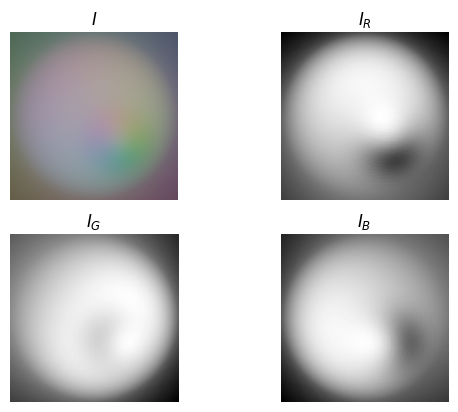

In [109]:
## get image I ##
bmp = mi.Bitmap('../scenes/img/normal-10-10.png')

I = mi.TensorXf(bmp)/256

I_R = I[:,:,0]
I_G = I[:,:,1]
I_B = I[:,:,2]

f, ax = plt.subplots(2,2)
ax[0,0].imshow(I); ax[0,0].axis('off');ax[0,0].set_title("$I$")
ax[0,1].imshow(I_R,cmap='gray');ax[0,1].axis('off');ax[0,1].set_title("$I_R$");
ax[1,0].imshow(I_G,cmap='gray');ax[1,0].axis('off');ax[1,0].set_title("$I_G$");
ax[1,1].imshow(I_B,cmap='gray');ax[1,1].axis('off');ax[1,1].set_title("$I_B$");

In [110]:
## get position P ##
N = 24
LED0_pos = mi.Point3f(-34.41,0,-12.5)
angle = 2*dr.pi/N*dr.arange(mi.Float,N)
Q = dr.rotate(mi.Quaternion4f,mi.Vector3f(0, 0, 1),angle)
P = dr.quat_to_matrix(Q, 3)@LED0_pos

In [111]:
## Initial Estimation of Surface Z0 ##
M = 128
N = 128

Z0 = mi.TensorXf(0,[M,N])

from utils.meshbuilder import grid_mesh_build
mesh = grid_mesh_build([-35,-35],[35,35],[M,N],Z0.array)

scene = mi.load_dict({
    "type": "scene",
    "facedisk": mesh,
})


In [112]:
## Step 1: Get estimation position of each pixel            ##
## Step 2: Get incident direction/intensity for each LED    ##
## Step 2: Calculate Matrix R and surface normal            ##